In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("ethereum_daily_data_2018_2024.csv")
df

,time,Open,High,Low,Close,Volume
0,2018-01-01,741.69,766.49,718.90,757.22,910875.63
1,2018-01-02,756.17,882.61,756.17,861.97,1123318.86
2,2018-01-03,861.97,951.70,847.90,941.10,871172.13
3,2018-01-04,941.00,997.44,901.03,944.83,822844.78
4,2018-01-05,944.50,1165.81,926.75,963.88,1682729.53
...,...,...,...,...,...,...
2457,2024-09-22,2613.27,2632.42,2525.50,2581.43,433318.91
2458,2024-09-23,2581.43,2703.72,2540.14,2647.17,797788.43
2459,2024-09-24,2647.17,2671.47,2591.67,2653.41,564932.40
2460,2024-09-25,2653.41,2673.98,2554.44,2579.69,458195.34


In [ ]:
df.index = pd.to_datetime(df['time'], format='%Y-%m-%d')
df[:26]

,time,Open,High,Low,Close,Volume
time,,,,,,
2018-01-01,2018-01-01,741.69,766.49,718.90,757.22,910875.63
2018-01-02,2018-01-02,756.17,882.61,756.17,861.97,1123318.86
2018-01-03,2018-01-03,861.97,951.70,847.90,941.10,871172.13
2018-01-04,2018-01-04,941.00,997.44,901.03,944.83,822844.78
2018-01-05,2018-01-05,944.50,1165.81,926.75,963.88,1682729.53
2018-01-06,2018-01-06,963.88,1056.96,958.73,1008.36,975679.49
2018-01-07,2018-01-07,1006.41,1117.84,1003.21,1117.75,563476.81
2018-01-08,2018-01-08,1117.75,1228.25,967.84,1136.11,1137114.56
2018-01-09,2018-01-09,1136.11,1300.30,1133.70,1289.24,812642.22


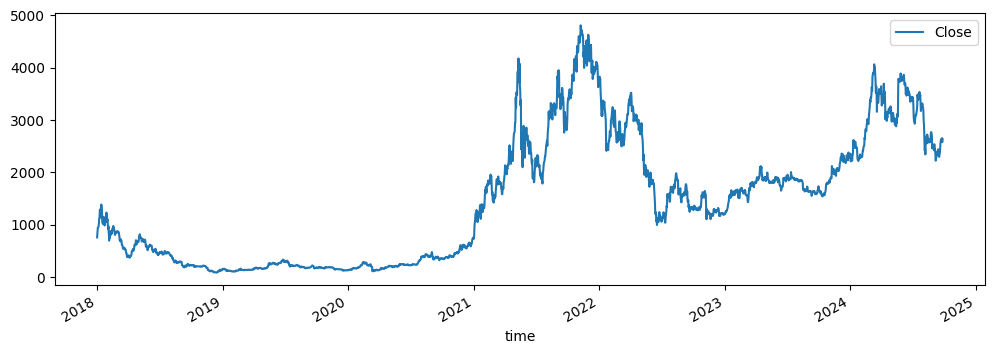

In [ ]:
temp = df[['Close']]
temp.plot(figsize = (12, 4))
plt.show()

In [ ]:
scaler = StandardScaler()
#Adatto lo scaler e transformo i dati
temp_scaled = scaler.fit_transform(temp)
#Ricostruisco il dataframe
temp_scaled = pd.DataFrame(temp_scaled, index = temp.index, columns=['Close'])
temp_scaled.head()

,Close
time,
2018-01-01,-0.571808
2018-01-02,-0.485284
2018-01-03,-0.419922
2018-01-04,-0.416841
2018-01-05,-0.401106


In [ ]:
def df_to_X_y(df, window_size=5):
  arr = np.asarray(df).astype(np.float32).reshape(-1)
  X = []
  y = []
  for i in range(len(arr) - window_size):
      X.append(arr[i:i+window_size])
      y.append(arr[i+window_size])
  X = np.array(X)[:, :, None]
  y = np.array(y)
  return X, y

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp_scaled, WINDOW_SIZE)
y1 = y1.flatten()
X1.shape, y1.shape

((2457, 5, 1), (2457,))

In [ ]:
n = len(X1)
train_end = int(n * 0.7)
val_end = int(n * 0.85)


X_train1, y_train1 = X1[:train_end], y1[:train_end]
X_val1, y_val1 = X1[train_end:val_end], y1[train_end:val_end]
X_test1, y_test1 = X1[val_end:], y1[val_end:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1719, 5, 1), (1719,), (369, 5, 1), (369,), (369, 5, 1), (369,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((96, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer = Adam(1e-3), loss = 'mse', metrics = ['mae'])

In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience = 8, restore_best_weights = True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-5)

In [ ]:
history = model1.fit(
    X_train1, y_train1,
    validation_data=(X_val1, y_val1),
    epochs=100,
    batch_size=256,
    shuffle=False,
    callbacks=[es, rlr],
    verbose=1
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.7323 - mae: 0.7909 - val_loss: 0.0544 - val_mae: 0.1975 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4591 - mae: 0.6012 - val_loss: 0.0490 - val_mae: 0.1898 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2430 - mae: 0.3845 - val_loss: 0.0489 - val_mae: 0.2068 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1363 - mae: 0.1792 - val_loss: 0.0465 - val_mae: 0.2078 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1141 - mae: 0.1901 - val_loss: 0.0340 - val_mae: 0.1753 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0893 - mae: 0.1872 - val_loss: 0.0178 - val_mae: 0.1197 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0521 - mae: 0.1057 - val_loss: 0.0076 - val_mae: 0.0714 - learning_rate: 0.0010
Epoch 8/100
7/7 ━━━━

In [ ]:
y_pred_test_scaled = model1.predict(X_test1, verbose=0).ravel()

In [ ]:
y_test_inv = scaler.inverse_transform(y_test1.reshape(-1,1)).ravel()
y_pred_inv = scaler.inverse_transform(y_pred_test_scaled.reshape(-1,1)).ravel()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# MAPE (con protezione contro divisioni per zero)
mape = np.mean(np.abs((y_test_inv, y_pred_inv) / np.clip(y_test_inv, 1e-10, None))) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 296.46
Root Mean Squared Error (RMSE): 371.48
Mean Absolute Percentage Error (MAPE): 95.68%


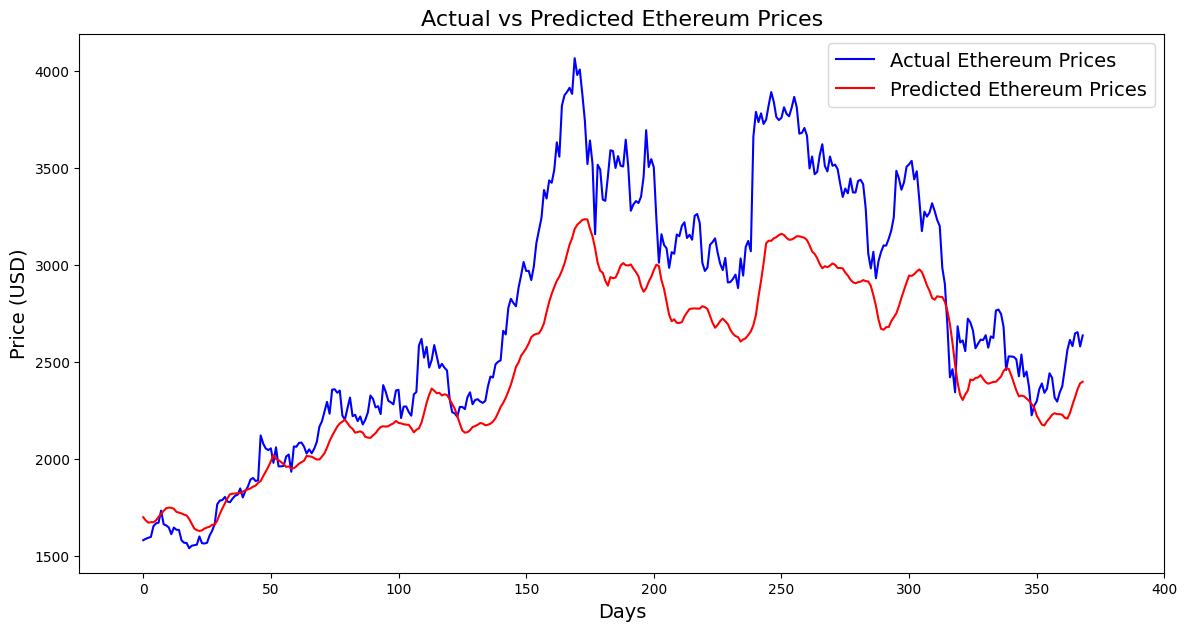

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label="Actual Ethereum Prices", color = 'blue')
plt.plot(y_pred_inv, label="Predicted Ethereum Prices", color = 'red')
plt.title('Actual vs Predicted Ethereum Prices', fontsize = 16)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Price (USD)', fontsize = 14)
plt.xlim(-25, 400)
plt.legend(fontsize = 14)
plt.show()